In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

np.random.seed(0)

In [40]:
#data = pd.read_csv('3-BasicCV0107C1.csv')
data = pd.read_csv('BasicCVAllDatawhitoutpenalty-07073.csv')
#data = pd.read_csv('BasicCVAllDatawhitoutpenalty-07072.csv')
#data = pd.read_csv('2-BasicCV0107C1.csv')
data.columns = ['null','p', 'c', 'size', 'accTrain', 'accTest', 
                'f1Train', 'f1Test']
data = data[data['size']==1000]
data = data[data['p']<3]
data['model'] = 'LR('+data['p'].astype(str)+','+data['c'].astype(str)+')'
data = data[1:]
data.head()

,null,p,c,size,accTrain,accTest,f1Train,f1Test,model
3,3,1,4,1000,0.891813,0.767774,0.893568,0.467639,"LR(1,4)"
6,6,1,6,1000,0.911143,0.755109,0.912924,0.451346,"LR(1,6)"
9,9,1,8,1000,0.921925,0.751211,0.923743,0.445717,"LR(1,8)"
12,12,1,10,1000,0.927827,0.753036,0.929650,0.446980,"LR(1,10)"
15,15,1,12,1000,0.932281,0.733203,0.934048,0.425169,"LR(1,12)"


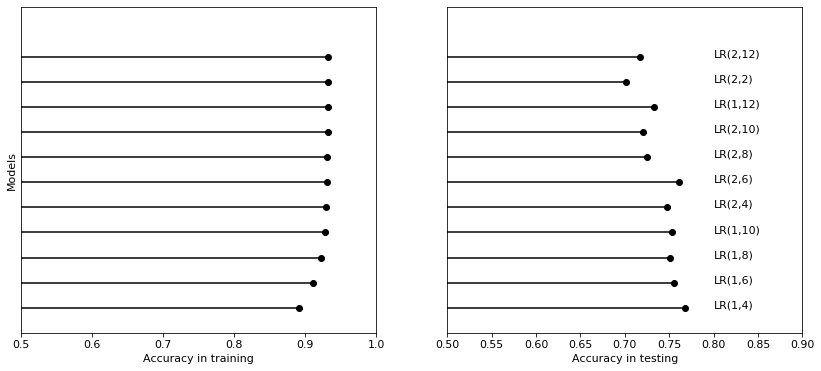

In [41]:
startLine = 0.5
ordered_df = data.sort_values(by=['accTrain'], ascending=True)
my_range=range(1,len(data.index)+1)
plt.figure(figsize=(14,6)) 
plt.subplot(1, 2, 1)
SMALL_SIZE = 11
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)

plt.hlines(y=my_range, xmin=startLine,
           xmax=ordered_df['accTrain'], color='black')
plt.plot(ordered_df['accTrain'], my_range, "o",color ='black')
plt.xlabel('Accuracy in training')
plt.ylabel('Models')
plt.ylim(0, len(data.index)+2)
plt.yticks([])
plt.xlim(startLine, 1)

plt.subplot(1, 2, 2)
plt.hlines(y=my_range, xmin=startLine, 
           xmax=ordered_df['accTest'], color='black')
plt.plot(ordered_df['accTest'], my_range, "o", color ='black')
plt.xlabel('Accuracy in testing')
#plt.ylabel('Model')
plt.ylim(0, len(data.index)+2)
plt.yticks([])
plt.xlim(startLine, 0.9)
for j in range(ordered_df.shape[0]):
    #print(j)
    #print(ordered_df['model'].iloc[j])
    plt.annotate(ordered_df['model'].iloc[j], xy=(ordered_df['accTest'].max()+0.05, j+1), 
                 xytext=(0.8, j+1))

In [7]:
data = pd.read_csv('Informative_rrlyr-VAR1-0702.csv')
data.columns = ['a','b', 'c', 'd', 'e', 'f','g','h','i', 'j']
data

,a,b,c,d,e,f,g,h,i,j
0,0,1,2,-1106.050464,1000,"{'Intercept': 0.9999993396845058, 'col0': 0.99...",0.484,0.884722,0.000000,0.000411
1,1,1,4,-1199.520919,1000,"{'Intercept': 0.9999984253469122, 'col0': 1.00...",0.571,0.886606,0.300163,0.444548
2,2,1,6,-1223.765112,1000,"{'Intercept': 0.9999983320563273, 'col0': 1.00...",0.569,0.889272,0.289951,0.449653
3,3,1,8,-1232.568919,1000,"{'Intercept': 1.0000045505788158, 'col0': 1.00...",0.570,0.888917,0.297386,0.446844
4,4,1,10,-1207.076271,1000,"{'Intercept': 1.000002319623206, 'col0': 0.999...",0.582,0.892554,0.330128,0.480852
5,5,1,12,-1671.673285,1000,"{'Intercept': 1.0000005303672117, 'col0': 1.00...",0.535,0.868930,0.221106,0.316297
6,6,2,2,-930.543074,1000,"{'Intercept': 1.0000024366312645, 'col0': 1.00...",0.652,0.891724,0.502857,0.518519
7,7,2,4,-1179.995126,1000,"{'Intercept': 0.9999996775137139, 'col0': 1.00...",0.728,0.928334,0.645833,0.684570
8,8,2,6,-1151.142005,1000,"{'Intercept': 1.0000052672377744, 'col0': 1.00...",0.736,0.930241,0.658915,0.696932
9,9,2,8,-1122.086934,1000,"{'Intercept': 1.0000029894221996, 'col0': 0.99...",0.745,0.929637,0.675159,0.698083


In [8]:
del data['f']
del data['a']
data = data[1:]

In [9]:
data = data[data['e']==1000]
data['model'] = 'BLR('+data['b'].astype(str)+','+data['c'].astype(str)+')'
data.head()

,b,c,d,e,g,h,i,j,model
1,1,4,-1199.520919,1000,0.571,0.886606,0.300163,0.444548,"BLR(1,4)"
2,1,6,-1223.765112,1000,0.569,0.889272,0.289951,0.449653,"BLR(1,6)"
3,1,8,-1232.568919,1000,0.570,0.888917,0.297386,0.446844,"BLR(1,8)"
4,1,10,-1207.076271,1000,0.582,0.892554,0.330128,0.480852,"BLR(1,10)"
5,1,12,-1671.673285,1000,0.535,0.868930,0.221106,0.316297,"BLR(1,12)"


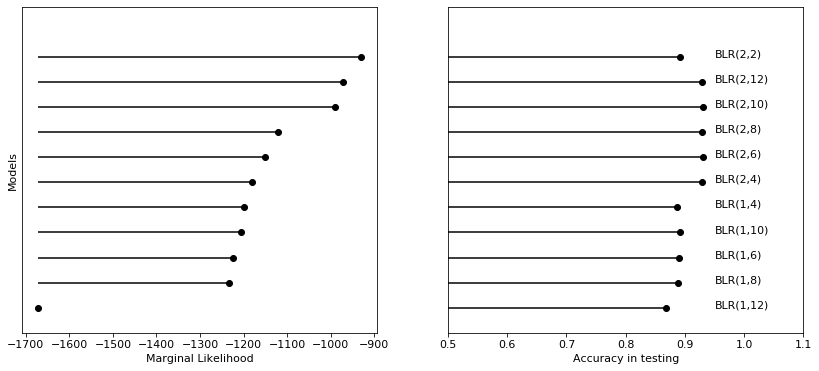

In [13]:
startLine = data['d'].min()
ordered_df = data.sort_values(by=['d'], ascending=True)
my_range=range(1,len(data.index)+1)
plt.figure(figsize=(14,6)) 
plt.subplot(1, 2, 1)
SMALL_SIZE = 11
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)

plt.hlines(y=my_range, xmin=startLine,
           xmax=ordered_df['d'], color='black')
plt.plot(ordered_df['d'], my_range, "o",color ='black')
plt.xlabel('Marginal Likelihood')
plt.ylabel('Models')
plt.ylim(0, len(data.index)+2)
plt.yticks([])
#plt.xlim(startLine, 1)

plt.subplot(1, 2, 2)
plt.hlines(y=my_range, xmin=0.5, 
          xmax=ordered_df['h'], color='black')
plt.plot(ordered_df['h'], my_range, "o", color ='black')
plt.xlabel('Accuracy in testing')
#plt.ylabel('Model')
plt.ylim(0, len(data.index)+2)
plt.yticks([])
plt.xlim(0.5, 1.1)
for j in range(ordered_df.shape[0]):
    #print(j)
    #print(ordered_df['model'].iloc[j])
    
    plt.annotate(ordered_df['model'].iloc[j], xy=(ordered_df['i'].max()+0.05, j+1), 
                 xytext=(0.95, j+1))